# Opérations mathématiques sur les tableaux NumPy

## A. Compléments sur les tableaux NumPy

Voici quelques méthodes bien utiles dans la manipulation de tableaux NumPy.

Soit $M$ une matrice NumPy de *shape* `(n, m)`:

- `M.ravel()` **retourne** (sans modifier `M`) le tableau "aplati" (vecteur) de *shape* `(n+m,)`


- `M.sum([axis])` **retourne** le scalaire ou tableau contenant la/les somme(s) des éléments [selon l'axe `axis`]:
    
    - `M.sum()` pour faire la somme de tous les élémnts de $M$ (scalaire)

    - `M.sum(axis=0)` pour faire la somme des colonnes (vecteur de *shape* `(m,)`)
    
    - `M.sum(axis=1)` pour faire la somme des lignes (vecteur de *shape* `(n,)`)

- `M.prod([axis])` **retourne** le scalaire ou tableau contenant le(s) produit(s) des éléments [selon l'axe `axis`]

- `M.mean([axis])` **retourne** le scalaire ou tableau contenant la/les moyenne(s) des éléments [selon l'axe `axis`]

- `M.min([axis])` **retourne** le scalaire ou tableau contenant le(s) minimum(s) des éléments [selon l'axe `axis`] (idem pour `M.max([axis])`)

- `M.argmin([axis])` **retourne** le scalaire ou tableau contenant le/les indice(s) du (premier) minimum des éléments [selon l'axe `axis`] (idem pour `M.argmax([axis])`)

- `M.sort(axis=-1)`**trie** le tableau $M$ selon l'axe `axis` (par défaut selon la dernière dimension) :

    - `M.sort()` (ou `M.sort(axis=1)` ou `M.sort(axis=-1)`) pour trier les éléments de chaque ligne
    
    - `M.sort(axis=0)` pour trier les éléments de chaque colonne

- `M.argsort(axis=-1)`**retourne** le tableau (même *shape* que $M$) des indices des éléments triés selon l'axe `axis` (par défaut selon la dernière dimension)


Commencez par tester chacune de ces méthodes sur une matrice $M$ `(3, 4)` composée d'entiers tirés aléatoirement dans $\{0,9\}$ :

In [3]:
import numpy as np
M = np.random.randint(0,10, (3,4))
#print(M)

M.ravel()
#print("\n", M)
M.sum()
print("\n", M)
M.sum(axis=1)# somme des lignes
print("\n", M)



 [[4 3 4 5]
 [6 7 3 1]
 [1 1 6 5]]

 [[4 3 4 5]
 [6 7 3 1]
 [1 1 6 5]]


### Exercice 1 : encore des notes...

Soit `N` un tableau `(10, 6)` composé des notes simulées de 10 étudiants à chacune des 6 compétences du BUT Informatique pour le semestre 3.

In [2]:
N = np.array([[13.3, 16., 13.4, 3.4, 8.6, 8.9],
 [13.4, 15.4, 18.2, 18.9, 16.6, 10.2],
 [4.2, 14.2, 1.8, 7.3, 18., 6.6],
 [9.5, 11.9, 1., 14., 14.3, 9.7],
 [13.9, 13.9, 12.,  3.5, 7.2, 6.8],
 [2.5, 16.2, 10.9, 0.3, 4.3, 14.],
 [8.7, 7.6, 4.2, 11.5, 5.4, 2.4],
 [9.1, 10.8, 14.2, 8.1, 6.5, 7.2],
 [13.7, 9.1, 14.2, 7.8, 16.5, 9.],
 [12.3, 17., 9.9, 8.5, 11.4, 4.8]])


Pour chaque question ci-après, proposez une (séquence d') instruction(s) permettant d'y répondre.

1. Quelle est la moyenne générale de chaque étudiant?

In [ ]:
N.mean(axis=1, dtype=np.float16)  #axis 1 pck moy sur ligne pas colonne

array([10.6  , 15.445,  8.68 , 10.07 ,  9.555,  8.03 ,  6.637,  9.32 ,
       11.72 , 10.65 ], dtype=float16)

2. Quelle est la moyenne du meilleur étudiant?

In [4]:
N.mean(axis=1).max()

15.450000000000001

3. Quel est l'indice de l'étudiant ayant la meilleure moyenne?

In [ ]:
N.mean(axis=1).argmax()

1

4. Quel est le classement des étudiants?

In [ ]:
N.mean(axis=1).argsort()[::-1]
N.argsort(-N)# renverser liste trié, trier les valeurs négative

array([1, 8, 9, 0, 3, 4, 7, 2, 5, 6])

Voici la liste des noms des compétences :

In [7]:
competences = np.array(["Réaliser un développement d'application",
               "Optimiser des applications informatiques",
               "Administrer des systèmes informatiques communicants complexes",
               "Gérer des données de l'information",
               "Conduire un projet",
               "Travailler dans une équipe informatique"])

5. Quelle est (le nom de) la compétence la moins bien réussie?

In [9]:
competences[N.mean(axis=0).argmin()]

'Travailler dans une équipe informatique'

6. Affichez les (noms des) compétences par ordre de réussite décroissante?

In [10]:
competences[(-N).mean(axis=0).argsort()]

array(['Optimiser des applications informatiques', 'Conduire un projet',
       "Réaliser un développement d'application",
       'Administrer des systèmes informatiques communicants complexes',
       "Gérer des données de l'information",
       'Travailler dans une équipe informatique'], dtype='<U61')

7. Quels sont les indices des étudiants ayant validé toutes les compétences au semestre? (moyenne>10)

NB. la fonction [`numpy.where(`*condition*`)`](https://numpy.org/doc/stable/reference/generated/numpy.where.html#numpy.where) vous sera utile pour cette question.

In [ ]:
np.where((N>10).sum(axis=1) ==6)  #il faut que toute les competence soit sup a 10
np.where((N>10).all(axis=1)) #alternative

(array([1]),)

Au delà des méthodes propres aux objets `ndarray`, NumPy offre une multitude de [routines mathématiques](https://numpy.org/doc/stable/reference/routines.math.html).

Par exemple, pour appliquer la fonction exponentielle sur chaque élément d'une matrice $M$ on écrira `np.exp(M)` (et non `M.exp()` car `exp()` n'est pas une méthode définie sur les objets `ndarray`).

Entraînez-vous à utiliser ces routines sur votre tableau de notes.

In [ ]:
np.exp(N)
np.log(N)
np.sqrt(N)

---

## B. NumPy : Vectorisation et Broadcasting

La **<font color='red'>Vectorisation</font>** est un principe de calcul essentiel proposé par la librairie NumPy. Il vous permet de réaliser une opération sur chaque élément d'un tableau NumPy sans écrire de boucle Python. La vectorisation présente un double avantage :

- une **<font color='red'>simplification</font>** considérable de votre code

- une **<font color='red'>efficacité</font>** remarquable (code C optimisé)

Pour vous faire découvrir l'intérêt de la vectorisation, commencez par écrire (avec des boucles) une fonction Python qui somme terme à terme deux matrices de mêmes tailles : 

In [37]:
def somme(M1, M2):
    m3=M1[:]
    for i in range(len(M1)):
        for j in range(len(M1[0])):
            m3[i][j]= M1[i][j] + M2[i][j]
    return m3


print(somme([[1,2,3],[1,2,2]],[[1,2,3],[1,2,2]]))




[[2, 4, 6], [2, 4, 4]]


A l'aide du code ci-après, mesurez le temps d'exécution de votre fonction `somme(M1, M2)` sur des matrices aléatoires de tailles $(10,000 \times 10,000)$

In [38]:
import time
import random

debut = time.time()

# # votre code ici
# def mat_aleatoire(n):
#     matrice= []
#     for i in range (len(n)):
#         ligne=[]
#         for j in range(len(n)):
#             ligne.append(random.randint(0,10))
#         matrice.append(ligne)
#     return matrice


M1=  np.random.randint(0,100, size=(10000, 10000))
M2=  np.random.randint(0,100, size=(10000, 10000))

res= somme(M1, M2)





fin = time.time()
print("Temps d'exécution :", fin-debut)

KeyboardInterrupt: 

Remplacez l'appel `somme(M1, M2)` par l'opération NumPy `M1 + M2` et comparez. Alors...??? Simple et efficace!



Le principe de vectorisation vous permet donc d'additionner, soustraitre, multiplier, etc. deux tableaux NumPy **de mêmes tailles** en réalisant l'opération terme à terme :

- sur des vecteurs <img src="images/vectorisation_vecteurs.jpg" alt="Somme terme à terme de 2 vecteurs" height="150" style="display: block; margin: 0 auto"/>

- sur des matrices <img src="images/vectorisation_matrices.jpg" alt="Somme terme à terme de 2 matrices" height="150" style="display: block; margin: 0 auto"/>


- sur des tenseurs <img src="images/vectorisation_tenseurs.jpg" alt="Somme terme à terme de 2 tenseurs" height="150" style="display: block; margin: 0 auto"/> 

### Exercice 2 : les années bissextiles... encore!

En fait, vous avez (sans doutes) déjà utilisé le principe de vectorisation dans le TP précédent. Reprenez votre solution à l'exerice 3 du TP1 et identifiez les opérations mettant en oeuvre le principe de vectorisation.

Remarquez enfin qu'il est également possible d'appliquer ce principe sur des tableaux (NumPy) qui cette fois ne sont pas toujours de mêmes tailles. Par exemple dans la construction de masques pour l'indexation booléenne :

In [20]:
t = np.random.randint(0, 10, (5,))
print(t)
masque = t > 5
t[masque]  # renvoie le sous-tableau des valeurs satisfaisant au masque

[8 9 3 7 5]


array([8, 9, 7])

Dans cet exemple, l'opération `t > 5` ressemble à de la vectorisation entre un tableau `t` de dimension $(5,)$ et un scalaire (simple valeur numérique). En effet, l'opération `> 5` est bien réalisée sur chaque élément du tableau `t`.

C'est le principe de **<font color='red'>Broadcasting</font>** qui est utilisé ici pour réaliser une opération sur des tableaux NumPy de tailles différentes. Mais attention, pour qu'une telle opération puisse être réalisée, **<font color='red'>les tableaux doivent avoir des tailles COMPATIBLES!</font>**

Essayons d'identifier ensemble ce que l'on entend par "tailles compatibles"...

### Exercice 3 : les dimensions compatibles pour le Broadcasting

Pour chaque opération ci-après, essayez de deviner d'abord si l'opération sera permise (tailles compatibles) puis le résultat de l'opération.

In [21]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 7).reshape((3,2))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1 2]
 [3 4]
 [5 6]]
A + B =
 [[ 1  3]
 [ 5  7]
 [ 9 11]]


In [22]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 7).reshape((2,3))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1 2 3]
 [4 5 6]]


ValueError: operands could not be broadcast together with shapes (3,2) (2,3) 

In [23]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 2).reshape((1,1))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1]]
A + B =
 [[1 2]
 [3 4]
 [5 6]]


In [24]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 4).reshape((3,1))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1]
 [2]
 [3]]
A + B =
 [[1 2]
 [4 5]
 [7 8]]


In [25]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 3).reshape((2,1))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1]
 [2]]


ValueError: operands could not be broadcast together with shapes (3,2) (2,1) 

In [26]:
A = np.arange(0, 6).reshape((3,2))
B = np.arange(1, 3).reshape((1,2))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0 1]
 [2 3]
 [4 5]]
B =
 [[1 2]]
A + B =
 [[1 3]
 [3 5]
 [5 7]]


In [27]:
A = np.arange(0, 3).reshape((3,1))
B = np.arange(1, 3).reshape((1,2))
print("A =\n", A)
print("B =\n", B)
print("A + B =\n", A + B)

A =
 [[0]
 [1]
 [2]]
B =
 [[1 2]]
A + B =
 [[1 2]
 [2 3]
 [3 4]]


Deux matrices $A$ et $B$ ont des tailles compatibles pour le broadcasting si elles vérifient l'une des propriétés suivantes :

- $A$ et $B$ sont de mêmes tailles (elles sont superposables, on parle alors de vectorisation)

- $A$ et $B$ ont le même nombre de lignes et l'une des deux matrices n'a qu'une seule colonne

- $A$ et $B$ ont le même nombre de colonnes et l'une des deux matrices n'a qu'une seule ligne

- l'une des matrices n'a qu'une ligne et l'autre n'a qu'une colonne


Généralisons : deux tableaux $A$ et $B$ $n$-dimensionnels sont compatibles pour le broadcasting si $$\forall k \in \{1, n\},~ dim_k(A)\neq dim_k(B) \Rightarrow min\{dim_k(A), dim_k(B)\}=1$$

Autrement dit, pour chaque axe :

- soit les deux tableaux ont la même taille

- soit l'un des deux est de taille de 1

### Exercice 4 : l'occasion est trop belle

Ecrire une fonction `compatibles(A, B)` indiquant si deux tableaux sont compatibles pour le broadcasting

In [11]:

def compatibles(A, B):
    if A.ndim != B.ndim:
        return False
    
    taille_dim_a =A.shape[::-1]
    taille_dim_b =B.shape[::-1]
    n=len(taille_dim_a)

    for i in range (n):
        a=taille_dim_a[i]
        b=taille_dim_b[i]

        if a!=b and min(a,b)!=1:
            return False
    return True




Testez votre fonction :

In [12]:
assert compatibles(np.ones((3,2)), np.ones((3,2)))
assert compatibles(np.ones((3,1)), np.ones((3,2)))
assert compatibles(np.ones((3,2)), np.ones((1,2)))
assert compatibles(np.ones((1,2)), np.ones((3,1)))
assert not compatibles(np.ones((3,2,4)), np.ones((3,2)))
assert not compatibles(np.ones((1,2,1)), np.ones((1,1)))
assert not compatibles(np.ones((3,2)), np.ones((2,3)))

Lors d'une opération entre deux tableaux de `shape` différentes (mais compatibles), le broadcasting est le processus (automatique) qui va consister à étendre les dimensions d'un tableau (voire des deux tableaux) par recopie des valeurs, de sorte à les ramener à deux tableaux de même `shape` et ainsi pouvoir réaliser l'opération par vectorisation :

- matrice + colonne <img src="images/Broadcasting1.jpg" alt="Broadcasting : matrice + colonne" height="200" style="display: block; margin: 0 auto"/>

- matrice + ligne <img src="images/Broadcasting2.jpg" alt="Broadcasting : matrice + ligne" height="150" style="display: block; margin: 0 auto"/>


- ligne + colonne <img src="images/Broadcasting3.jpg" alt="Broadcasting : ligne + colonne" height="200" style="display: block; margin: 0 auto"/>

### Exercice 5 : reprise de notes

Le tableau `Notes` ci-après correspond aux moyennes de 10 étudiants aux 15 ressources et SAE du semestre 4 du BUT Informatique.

Le tableau `Coefs` quant à lui contient les coefficients de chaque ressource (12 premières lignes) ou SAE (3 dernières lignes) pour chaque compétence (`Coef[i,j]` contient le coefficient de la ressource `i` dans le calcul de la moyenne de la compétence `j`). 

In [ ]:
Notes = np.array([[11.5, 12.5, 11.2, 13.7,  8.3,  4.8,  9. ,  4.1, 11.3, 10.4, 11.5,
        11.3,  0.7, 14.1, 13.6],
       [12.6,  7.9, 14.2, 10.3,  7.5, 10.6,  8.6, 14.6, 13.5,  8.8, 13.3,
        14.9, 14.1,  5.9,  9. ],
       [ 9.5,  0.3,  7.4,  5.8, 11.7, 19.6,  6.3, 12.8, 12.1, 16.2,  7.8,
         9.9,  6.7,  9.2, 10.4],
       [ 8.9, 12.9,  7.3, 10.7, 13.7,  9.4, 12.9, 13.8, 14.6, 12. , 17.9,
        11.4, 13.2,  9.2, 11.3],
       [10.8,  9.5, 14.6,  9.1, 15.7,  1.9, 14.1, 12.4, 10.7, 16. , 12.2,
         8.1,  8. , 14.1,  7. ],
       [15.8, 10.3, 17.5,  9.4, 10. , 10.1, 11.9,  9.6,  7.3,  9.9, 11.4,
         6.7, 13.5, 18.7,  8.3],
       [ 9.3,  2.7,  3.3, 11.7, 16.3,  5.3, 10.6, 13.8,  4.8,  7.2,  8.4,
         9.2,  6.7, 14. , 10.8],
       [13.7, 12.3,  8.8,  7.6, 11.7, 12.2, 13.3, 11.8, 14. ,  6. , 11.3,
         9.1,  9.4,  9.7,  7.1],
       [13.7,  8.9,  8.5,  7.2,  9.2,  5.8, 11.9,  8.9,  7.2, 11.4,  9.3,
         7.1,  3.4, 18.3, 12.3],
       [ 2.4,  7.7, 15.6, 14.4,  8.1, 10.9,  8.8,  9.7,  5.4, 13.2, 14.1,
        10.9,  5.4,  3. ,  7.4]])

Coefs = np.array([[16,  0, 12,  0,  0,  4],
       [ 8,  0,  0,  0, 10,  0],
       [ 0,  0,  0, 18,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0, 13],
       [ 0,  0,  0,  6,  0, 13],
       [ 0,  0,  0,  0,  0, 10],
       [ 0,  0, 28,  0,  0,  0],
       [ 0,  4,  0,  0, 22,  0],
       [ 8,  4,  0,  8,  4,  0],
       [ 8,  4,  0,  8,  4,  0],
       [ 0, 12,  0,  0,  0,  0],
       [15, 15, 15, 15, 15, 15],
       [40, 40, 40, 40, 40, 40], #12
       [ 5,  5,  5,  5,  5,  5]])

1. Vérifiez que pour chaque compétence du semestre 4 : les ressources ont un poids de 40% et les SAE ont un poids de 60%.

In [ ]:
ressource = Coefs[:12].sum(axis=0)
sae = Coefs[12:].sum(axis=0)

print("ressource =", ressource)
print("sae= ", sae)

ressource = [40 40 40 40 40 40]
sae=  [60 60 60 60 60 60]
[0.4 0.4 0.4 0.4 0.4 0.4]



2. Calculez la moyenne du 1er étudiant à la 1ère compétence 

In [20]:
#moy = somme des notes *coef / sommes des coefs
moy= (Notes[0]*Coefs[:,0]).sum()/ Coefs[:,0].sum()
print (moy)

11.017000000000001


3. Calculez la moyenne de chaque étudiant à la 1ère compétence

In [24]:
moy_c1= moy= (Notes*Coefs[:,0]).sum(axis=1)/ Coefs[:,0].sum()
print(moy_c1)

[11.017  9.341  8.669 11.073 11.934 14.976 10.097 10.205 13.005  5.564]


4. Calculez le tableau des moyennes de chaque étudiant à chaque compétence

In [29]:
num= (Notes[:, :, None]* Coefs[None,:, :]).sum(axis=1)
M= num/Coefs.sum(axis=0)
print(M)

[[11.017 11.085  8.953 10.481 11.037  9.488]
 [ 9.341  9.673 10.525  9.885  9.569  8.642]
 [ 8.669  9.001  9.929  9.633  8.857 10.284]
 [11.073 11.205 11.157 10.495 11.923 10.874]
 [11.934 11.438 11.958 12.188 11.622 11.32 ]
 [14.976 13.396 14.504 15.38  13.408 14.355]
 [10.097 11.121 12.125  9.305  9.095 11.385]
 [10.205  9.369 10.593  9.345 10.647 10.63 ]
 [13.005 11.645 12.581 11.979 11.747 12.133]
 [ 5.564  7.048  5.384  8.026  5.43   5.826]]


5. Stockez le tableau des moyennes dans une variable `M` puis visualisez les résultats des 10 étudiants sur un graphique à l'aide des instructions ci-après.

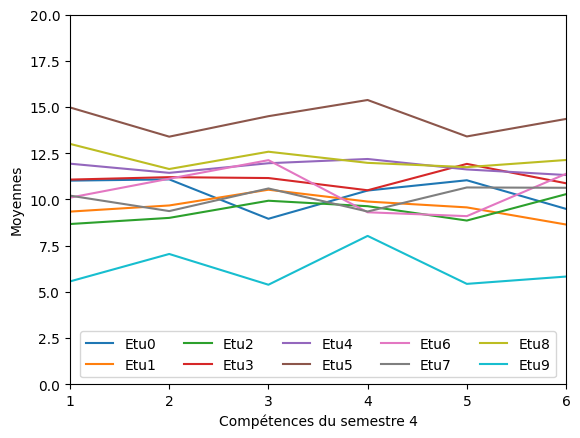

In [30]:
import matplotlib.pyplot as plt
x = np.arange(1,7)
plt.plot(x, M[:,:].T)
plt.axis([1, 6, 0, 20])
plt.xlabel('Compétences du semestre 4')
plt.ylabel('Moyennes')
plt.legend(np.char.add(np.array(['Etu']), np.arange(10).astype(str)), loc='lower center', ncol=5)
plt.show()

### Exercice 6 : Distances entre images

On rappelle qu'une image peut être stockée sous la forme d'un tableau à trois dimensions (R, G, B) ou *tenseur*. Ainsi une manière naïve de comparer deux images (de mêmes tailles) consiste à calculer la distance $L_2$ entre les deux tenseurs associés par l'expression suivante $$L_2(I_1, I_2) = \left(\sum_x \sum_y \sum_z (I_1[x,y,z]-I_2[x,y,z])^2\right)^{1/2}$$

1. Ecrire une fonction `distance(...)` qui calcule et renvoie la distance $L_2$ entre deux images 

In [31]:
def distance(image1, image2):
    return ((image1 - image2) ** 2).sum()

Vous trouverez dans le répertoire `images/DallE_Images/` un échantillon d'images générées par l'IA [DALL-E](https://openai.com/dall-e-2/) (Open AI).

2. Quelles sont les deux images les plus proches selon la distance $L_2$? (les instructions ci-dessous vous aideront à importer une image dans un tableau NumPy)

(1024, 1024, 3)


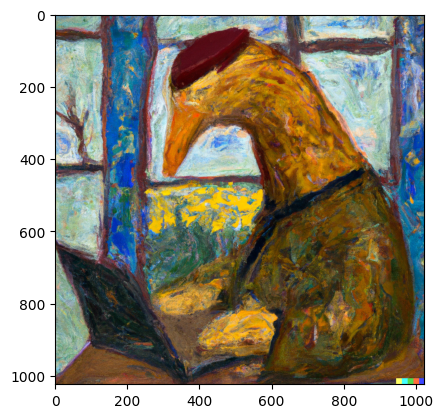

In [41]:
from PIL import Image

# import de l'image
#image = Image.open("images/DallE_Images/DALL·E 2023-01-22 15.53.09 - an oil painting by van gogh of a bird working on a laptop.png")
image = Image.open("images/DallE_Images/DALL├В┬╖E 2023-01-22 15.53.09 - an oil painting by van gogh of a bird working on a laptop.png")
image1 = Image.open("images/DallE_Images/DALL├В┬╖E 2023-01-22 15.53.09 - an oil painting by van gogh of a bird working on a laptop.png")

# représentation de l'image sous forme d'un tableau NumPy
array = np.array(image, dtype=np.int32)
print(array.shape)

# visualisation de l'image (à partir du tableau)
plt.imshow(array)
plt.show()

3. Définissez une nouvelle fonction pour le calcul de la distance mais cette fois sans vectorisation, sans broadcasting et sans utiliser les méthodes définies sur les tableaux NumPy (bref à l'ancienne avec des boucles!). Comparez le temps d'exécution...

In [42]:
def distance2(image1, image2):
    i, j, k = image1.shape
    s=0
    for i in range(i):
        for j in range(j):
            for k in range(k):
                s += (image1[i,j,k] - image2[i,j,k])**2
    return s


In [43]:
debutd1 = time.time()
distance(image, image1)
find1= time.time()
print("distance= ", find1-debutd1)


debutd2 = time.time()
distance(image, image1)
find2= time.time()
print("distance2= ", find2-debutd2)

TypeError: unsupported operand type(s) for -: 'PngImageFile' and 'PngImageFile'

4. Générez de nouvelles images sur [DALL-E](https://openai.com/dall-e-2/) et amusez-vous à comparer les distances...